In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

est = pd.read_csv('../../../data/cleandata/Estacoes/lat_lng_estacoes.csv', sep = ';')
label = pd.read_csv('../../../data/cleandata/Ordens de serviço/Enchentes_LatLong.csv', sep = ';')

repaired = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/repaired.csv', sep = ';')

In [2]:
error = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/error_regions.csv', sep = ';')

In [3]:
e = [c for c in error.columns if 'Precipi' in c]

In [4]:
error[e].sum()

Precipitacao_0_error    33021
Precipitacao_1_error    81449
Precipitacao_2_error    13364
Precipitacao_3_error    17502
Precipitacao_4_error    25544
dtype: int64

In [5]:
label['Data'] = pd.to_datetime(label['Data'], yearfirst = True)
gb_label = label.groupby('Data').count().reset_index()[['Data','lat']]
gb_label.columns = ['Data', 'count']

In [10]:
precipitacao = repaired[repaired['Data_Hora'].dt.minute == 0].copy()
precipitacao['Data_Hora'] = pd.to_datetime(repaired['Data_Hora'],yearfirst = True)
precipitacao['Data'] =  precipitacao['Data_Hora'].dt.date
r_plot = precipitacao.groupby('Data').sum().reset_index()[['Data','Precipitacao_2']]

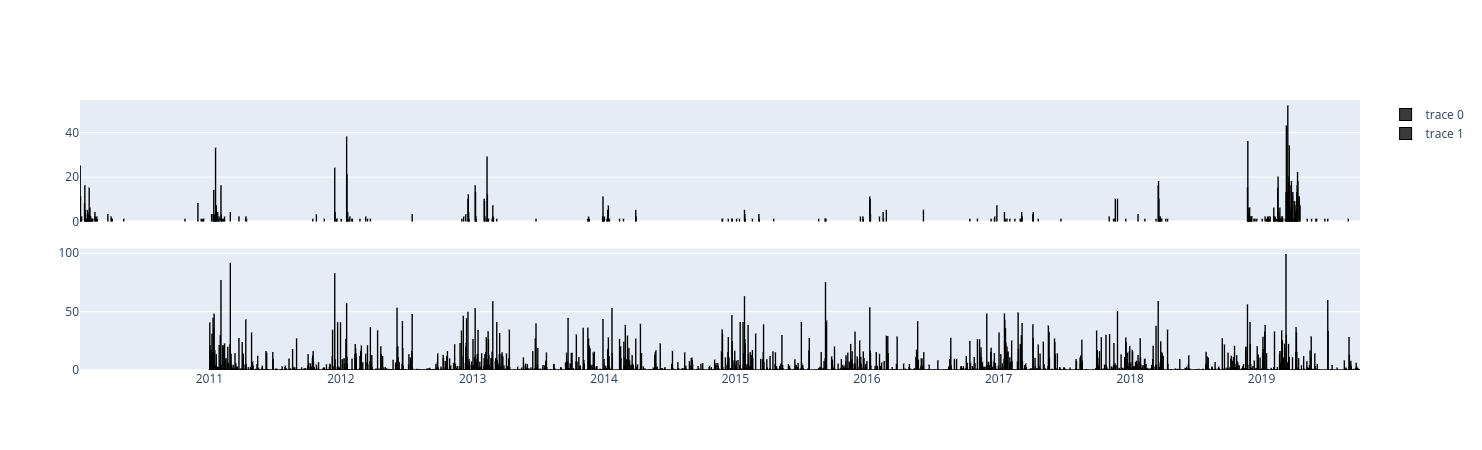

In [13]:
fig = make_subplots(2, 1, shared_xaxes=True, vertical_spacing = 0.1)
fig.add_trace(go.Bar(
                 x = gb_label['Data'],
                 y = gb_label['count'],
                    ),col = 1, row = 1,
             )

fig.add_trace(go.Bar(
                    x = r_plot['Data'],
                    y = r_plot['Precipitacao_2'] ,),
              row = 2, col = 1,
             )

fig.update_layout(bargap = 0)
fig.update_traces(marker_line_color='black',
                  marker_color='#3b3b3b',
                  marker_line_width=1,
                  opacity=1)
fig.show()


In [22]:
token = 'pk.eyJ1IjoiZmlwcG9saXRvIiwiYSI6ImNqeXE4eGp5bjFudmozY3A3M2RwbzYxeHoifQ.OdNEEm5MYvc2AS4iO_X3Pw'
mapbox_access_token = token

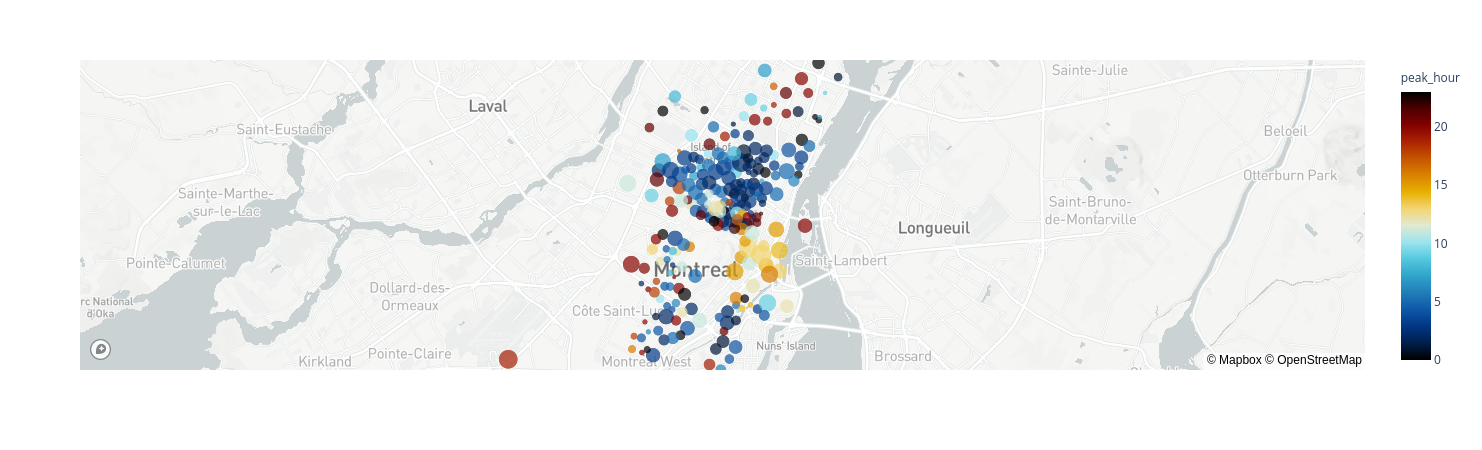

In [15]:
import plotly.express as px
px.set_mapbox_access_token(token)
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

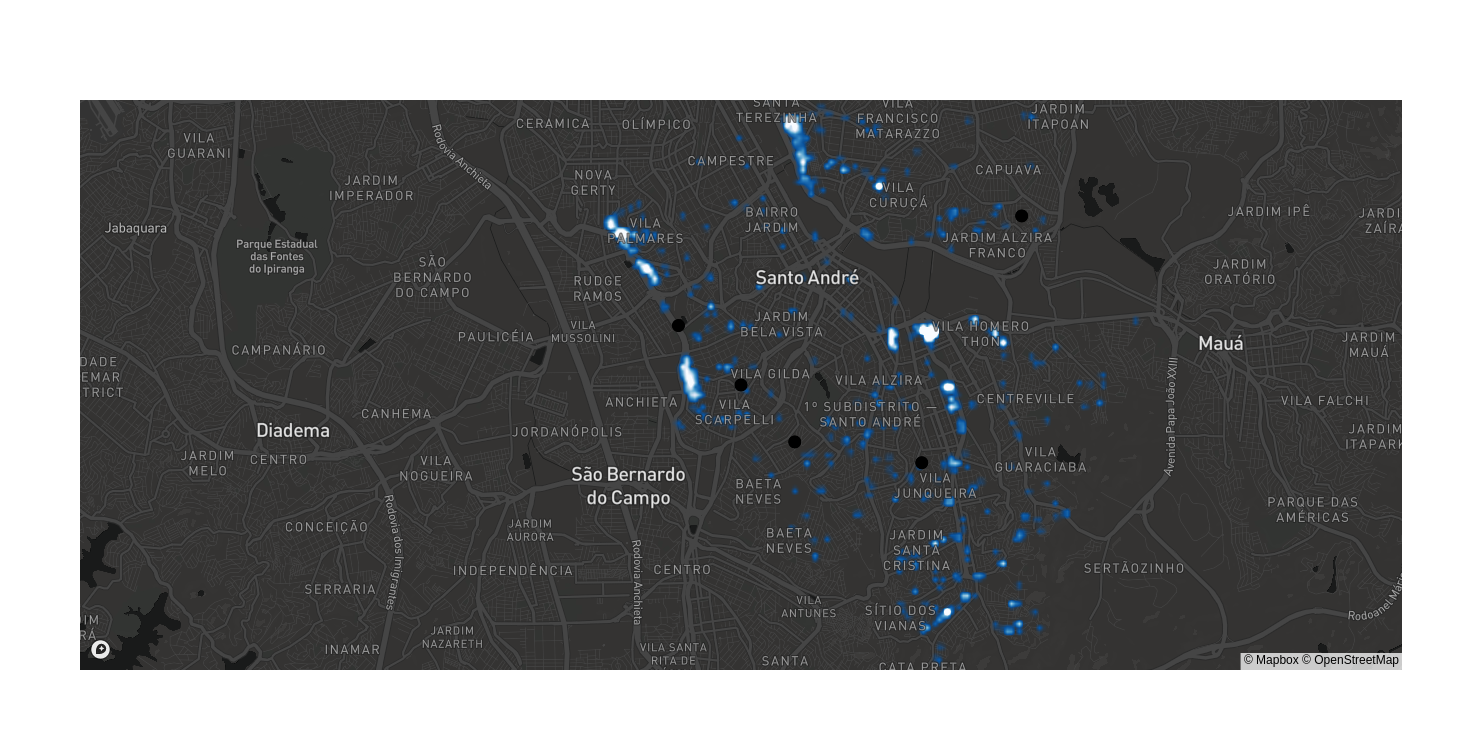

In [43]:
fig = go.Figure()


fig.add_trace(go.Scattermapbox(
    lat=est['lat'],
    lon=est['lng'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=14,
        color = 'black',
        symbol = 'circle'
    ),
   text=['Santo Amaro'],
            ))

fig.add_trace(go.Densitymapbox(
                    lat=label.lat,
                    lon=label.lng,
                    z=[1] * label.shape[0],
                    radius=5,
#                     colorscale = 'Reds',
                    colorscale = 'Blues',
                    reversescale=True,
                    opacity = 1,
    showscale=False
                ))

fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=est.iloc[-1,1],
            lon=est.iloc[-1,2],
        ),
#         style='outdoors',
        style='dark',
        pitch=0,
        zoom=12
    ),
    width = 750,
    height = 750,
    showlegend = False,
                )


fig.show()

In [ ]:
fig = go.Figure(go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Montreal'],
    ))
fig.show()